In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

api = KaggleApi()
api.authenticate()

In [5]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [6]:
train_data.shape

(343583, 25)

In [7]:
test_data.shape

(21018, 23)

In [8]:
test_data.columns
#ada 'id'
#tidak ada 'dealing', 'cnt', 'regency_cluster' 26 - 3 = 23

Index(['Unnamed: 0', 'id', 'time_date', 'site', 'continent_id',
       'buyer_country', 'buyer_region', 'buyer_city', 'distance', 'buyer_id',
       'mobile', 'package', 'channel_id', 'buying_date', 'dealing_date',
       'adults', 'children', 'room', 'destination_id', 'destination_type',
       'regency_continent', 'regency_country', 'regency_market'],
      dtype='object')

In [9]:
train_data.columns

Index(['Unnamed: 0', 'time_date', 'site', 'continent_id', 'buyer_country',
       'buyer_region', 'buyer_city', 'distance', 'buyer_id', 'mobile',
       'package', 'channel_id', 'buying_date', 'dealing_date', 'adults',
       'children', 'room', 'destination_id', 'destination_type', 'dealing',
       'regency_continent', 'regency_country', 'regency_market', 'cnt',
       'regency_cluster'],
      dtype='object')

In [10]:
train_data = train_data.drop("Unnamed: 0",axis = 1)

In [11]:
test_data.drop(["Unnamed: 0", "id"], axis = 1)

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,...,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
0,9/3/2015 17:09,2,3,66,174,37449,5539.0567,1,1,0,...,5/19/2016,5/23/2016,2,0,1,12243,6,6,204,27
1,9/24/2015 17:38,2,3,66,174,37449,5873.2923,1,1,0,...,5/12/2016,5/15/2016,2,0,1,14474,7,6,204,1540
2,6/7/2015 15:53,2,3,66,142,17440,3975.9776,20,0,0,...,7/26/2015,7/27/2015,4,0,1,11353,1,2,50,699
3,9/14/2015 14:49,2,3,66,258,34156,1508.5975,28,0,1,...,9/14/2015,9/16/2015,2,0,1,8250,1,2,50,628
4,7/17/2015 9:32,2,3,66,467,36345,66.7913,50,0,0,...,7/22/2015,7/23/2015,2,0,1,11812,1,2,50,538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21013,4/28/2015 18:04,2,3,66,351,54857,143.8128,9959,0,0,...,4/30/2015,5/1/2015,2,0,1,27036,1,2,50,1648
21014,7/19/2015 16:47,2,3,66,351,54857,3811.7386,9959,0,0,...,7/31/2015,8/1/2015,2,0,1,8253,1,6,70,19
21015,4/10/2015 14:40,24,2,3,59,1101,NaN,9961,0,1,...,4/15/2015,4/20/2015,1,0,1,8806,1,6,105,22
21016,1/11/2015 22:23,23,1,1,395,29254,292.6402,9982,1,1,...,4/4/2015,4/6/2015,2,0,1,8862,1,6,204,1466


<AxesSubplot:>

c:\users\san-z30\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


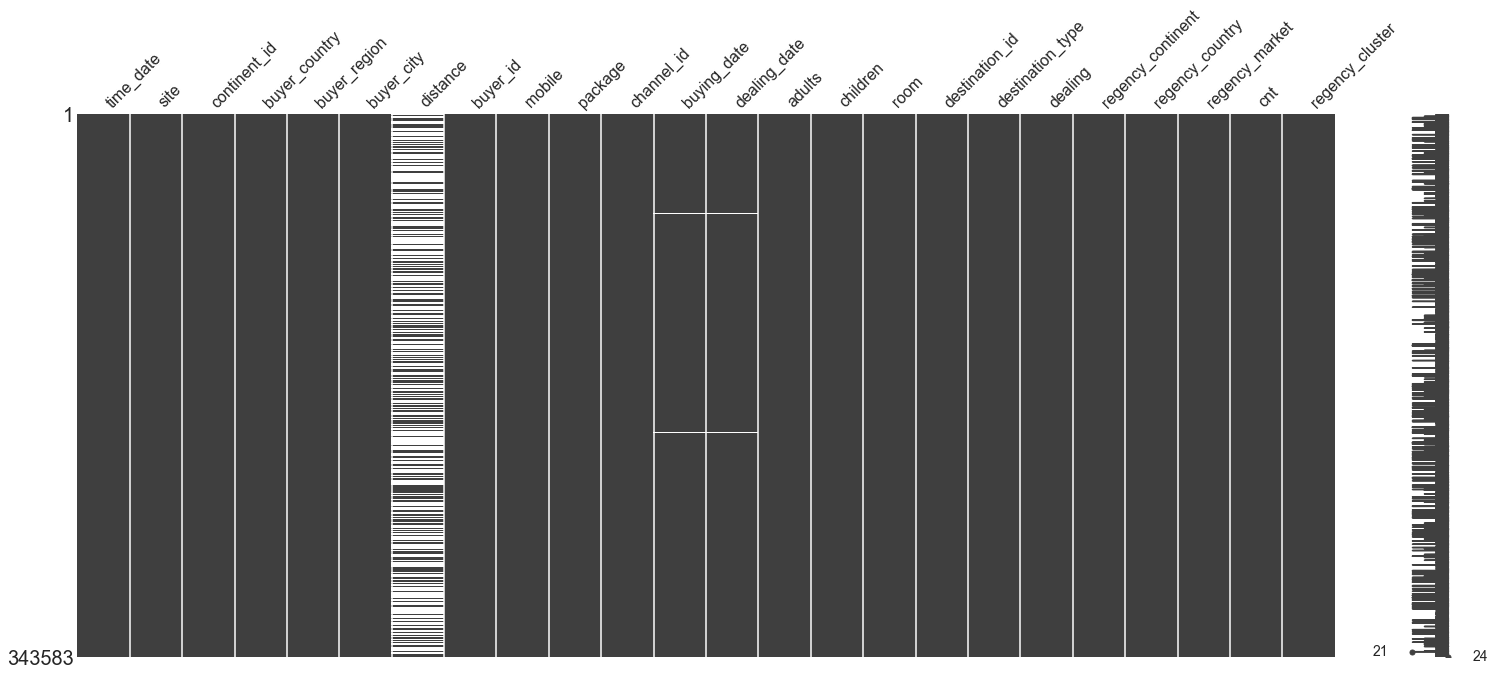

In [12]:
msno.matrix(train_data)

In [13]:
complete_1 = train_data[~train_data["distance"].isnull()]
missing_1 = train_data[train_data["distance"].isnull()]
missing_1.head()

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
6,7/16/2014 9:42,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,2,2,50,675,41
7,7/16/2014 9:45,2,3,66,189,10067,NaN,501,0,1,...,0,1,8267,1,0,1,2,50,675,41
8,7/16/2014 9:52,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,69
9,7/16/2014 9:55,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,70
10,7/16/2014 10:00,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,98


In [14]:
complete_1[["buyer_country","regency_country","mobile"]]

,buyer_country,regency_country,mobile
0,66,2,0
1,66,2,0
2,66,2,0
3,66,2,0
4,66,2,0
...,...,...,...
343441,66,4,0
343442,66,4,0
343443,66,4,0
343444,66,4,0


In [15]:
complete_1["mobile"].value_counts()

0    129229
1     16456
Name: mobile, dtype: int64

In [16]:
missing_1[["buyer_country","regency_country","mobile"]]

,buyer_country,regency_country,mobile
6,66,2,0
7,66,2,0
8,66,2,0
9,66,2,0
10,66,2,0
...,...,...,...
343578,69,2,1
343579,69,2,1
343580,69,2,1
343581,69,2,1


In [17]:
missing_1["mobile"].value_counts()

0    176389
1     21509
Name: mobile, dtype: int64

In [18]:
missing_2 = train_data[train_data["buying_date"].isnull()]
missing_2.head()

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
1671,6/10/2013 18:56,2,3,66,226,9427,1809.9688,7783,0,1,...,0,1,9171,1,0,1,4,118,200,66
2474,12/19/2014 19:14,24,2,3,50,5703,NaN,1365,1,0,...,1,1,8242,1,0,2,3,171,61,37
2819,4/4/2013 14:05,24,2,3,38,46556,NaN,2099,0,0,...,0,1,8818,1,0,1,3,99,88,82
2822,4/9/2013 16:07,24,2,3,38,46556,NaN,2099,0,0,...,0,1,8818,1,0,1,3,99,88,82
3009,10/9/2013 21:45,24,2,3,50,5703,NaN,3953,0,0,...,0,1,8822,1,0,1,3,130,91,64


In [19]:
missing_3 = train_data[train_data["dealing_date"].isnull()]
missing_3.head()

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
1671,6/10/2013 18:56,2,3,66,226,9427,1809.9688,7783,0,1,...,0,1,9171,1,0,1,4,118,200,66
2474,12/19/2014 19:14,24,2,3,50,5703,NaN,1365,1,0,...,1,1,8242,1,0,2,3,171,61,37
2819,4/4/2013 14:05,24,2,3,38,46556,NaN,2099,0,0,...,0,1,8818,1,0,1,3,99,88,82
2822,4/9/2013 16:07,24,2,3,38,46556,NaN,2099,0,0,...,0,1,8818,1,0,1,3,99,88,82
3009,10/9/2013 21:45,24,2,3,50,5703,NaN,3953,0,0,...,0,1,8822,1,0,1,3,130,91,64


<AxesSubplot:>

c:\users\san-z30\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


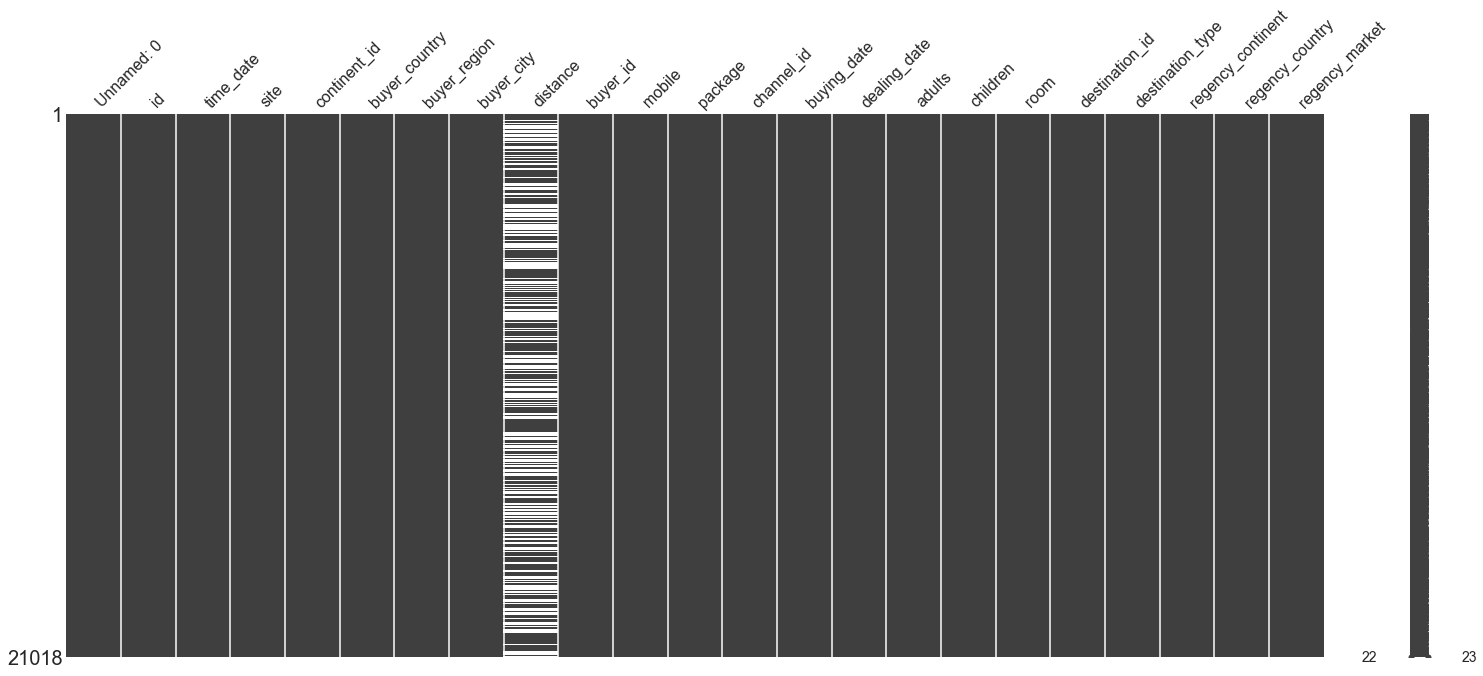

In [20]:
msno.matrix(test_data)

In [21]:
train_data[["room","adults","children"]].value_counts()

room  adults  children
1     2       0           162477
      1       0            77575
      2       1            24606
              2            17198
      3       0            10241
                           ...  
5     9       1                1
              2                1
              3                1
6     1       2                1
0     0       0                1
Length: 226, dtype: int64

In [22]:
train_data["room"].value_counts()

1    314286
2     22370
3      4350
4      1126
5       595
8       461
6       262
7       132
0         1
Name: room, dtype: int64

In [23]:
train_data[train_data.room == 0]

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
23686,7/27/2014 0:20,35,2,70,87,23000,NaN,5193,0,0,...,0,0,52263,7,0,1,3,106,108,85


In [24]:
reg_clus_85 = train_data[train_data.regency_cluster == 85]
reg_clus_85["room"].value_counts()

1    5126
2     318
3      74
4      19
5       9
8       7
6       6
7       2
0       1
Name: room, dtype: int64

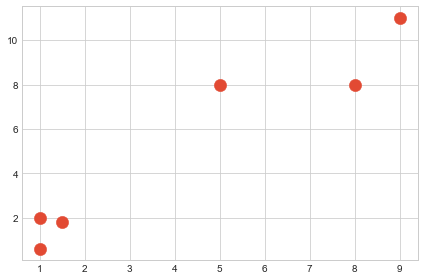

In [25]:
clust = np.array([[1,2],
                 [1.5,1.8],
                 [5,8],
                 [8,8],
                 [1,0.6],
                 [9,11]])

plt.scatter(clust[:,0],clust[:,1], s = 150)
plt.show()

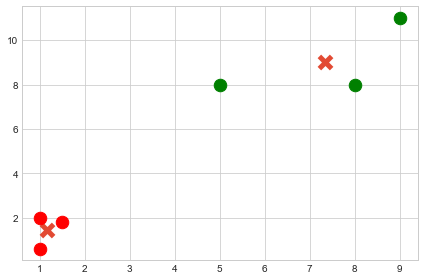

In [26]:
clf = KMeans(n_clusters = 2)
clf.fit(clust)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = 10*["g.","r.","c.","b.","k.","o."]

for i in range(len(clust)):
    plt.plot(clust[i][0], clust[i][1], colors[labels[i]], markersize = 25)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 150, linewidth = 5)
plt.show()

In [27]:
centers = [[1,1,1],[5,5,5],[3,10,10]]
dataset, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1)

ms = MeanShift()
ms.fit(dataset)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

[[ 4.95520486  5.52440914  4.80574309]
 [ 3.00862741 10.21197454 10.35247482]
 [ 1.2365749   1.00674423  0.97854237]]


In [28]:
n_clusters = len(np.unique(labels))
print("Number of estimated clusters: ", n_clusters)

Number of estimated clusters:  3


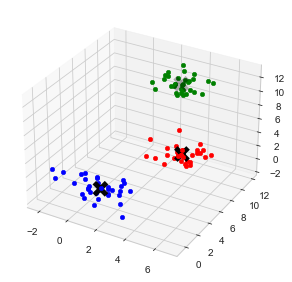

In [29]:
colors = 10*["r","g","b","c","y","k","m"]
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

for i in range(len(dataset)):
    ax.scatter(dataset[i][0],dataset[i][1],dataset[i][2], c = colors[labels[i]], marker = 'o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
           marker = "x", color = 'k', s = 150, linewidths = 5, zorder = 10)

plt.show()

In [30]:
train_data.head()

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,8/11/2014 7:46,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,8/11/2014 8:22,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,8/11/2014 8:24,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,8/9/2014 18:05,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,8/9/2014 18:08,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [31]:
test_data.head()

,Unnamed: 0,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,...,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
0,0,0,9/3/2015 17:09,2,3,66,174,37449,5539.0567,1,...,5/19/2016,5/23/2016,2,0,1,12243,6,6,204,27
1,1,1,9/24/2015 17:38,2,3,66,174,37449,5873.2923,1,...,5/12/2016,5/15/2016,2,0,1,14474,7,6,204,1540
2,2,2,6/7/2015 15:53,2,3,66,142,17440,3975.9776,20,...,7/26/2015,7/27/2015,4,0,1,11353,1,2,50,699
3,3,3,9/14/2015 14:49,2,3,66,258,34156,1508.5975,28,...,9/14/2015,9/16/2015,2,0,1,8250,1,2,50,628
4,4,4,7/17/2015 9:32,2,3,66,467,36345,66.7913,50,...,7/22/2015,7/23/2015,2,0,1,11812,1,2,50,538
